In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec


In [2]:

filename = './data/Base_movimientos.csv'


df_movimientos = pd.read_csv(filename, sep=';', decimal = ',')
df_movimientos.rename(columns={'PI_desc':'DIVISION','Categoria tiempo 2':'CAT_TIEMPO_2','Categoria tiempo 3':'CAT_TIEMPO_3','Tiempo (Min)':'TIEMPO'}, inplace=True)
df_movimientos.head()




,#,PI,DIVISION,Id_estado E1,Estado_desc,Fecha,Orden,Id_estado_anterior E0,Estado_ant_desc E0,E0_E1,Tiempo (Seg),TIEMPO,Categoria_tiempo,Mes,CAT_TIEMPO_2,CAT_TIEMPO_3
0,2,26610,RECEPCION SECOS,25,PERMISO ANULADO,2/7/2024 08:40,1,0,NaN,25,0.0,0.000000,NaN,202407,NaN,NaN
1,2,142775,RECEPCION SECOS,25,PERMISO ANULADO,21/2/2024 16:31,1,0,NaN,25,0.0,0.000000,NaN,202402,NaN,NaN
2,2,1407774,RECEPCION SECOS,15,PENDIENTE DE ARRIBO,3/1/2024 10:53,1,0,NaN,15,0.0,0.000000,NaN,202401,NaN,NaN
3,2,1407774,RECEPCION SECOS,16,ARRIBADO AL PREDIO,3/1/2024 10:54,2,15,PENDIENTE DE ARRIBO,15016,47.0,0.783333,PENDIENTE DE ARRIBO,202401,Registro de ingreso,Tiempo de ingreso al CD
4,2,1407774,RECEPCION SECOS,17,CON ANDEN ASIGNADO,3/1/2024 10:59,3,16,ARRIBADO AL PREDIO,16017,308.0,5.133333,ARRIBADO AL PREDIO,202401,Registro de ingreso,Tiempo de ingreso al CD


In [3]:
cols = ['Mes','PI','DIVISION', 'Categoria_tiempo','CAT_TIEMPO_2','CAT_TIEMPO_3','TIEMPO']
mask_meses = df_movimientos['Mes']<202410
df_movimientos_2 = df_movimientos[mask_meses]
mask_eventos_nul = (df_movimientos_2['Categoria_tiempo'].notna())
df_movimientos_2 = df_movimientos_2[mask_eventos_nul]
mask_eventos_inv = df_movimientos_2['Categoria_tiempo']!='PENDIENTE DE ARRIBO - FALTAN DATOS'
df_movimientos_2 = df_movimientos_2[mask_eventos_inv][cols]

# Descarga Propia
df_movimientos_2['Descarga_propia'] = df_movimientos_2['Categoria_tiempo'].apply(lambda x: True if x=='PENDIENTE DESCARGA PROPIA' else False)
df_movimientos_2['Descarga_propia'] = df_movimientos_2.groupby('PI')['Descarga_propia'].transform(max)

# Recepcion Agil
df_movimientos_2['Recepcion_agil'] = df_movimientos_2['Categoria_tiempo'].apply(lambda x: True if x=='EN RECEPCION AGIL' else False)
df_movimientos_2['Recepcion_agil'] = df_movimientos_2.groupby('PI')['Recepcion_agil'].transform(max)


# Rechazos
df_movimientos_2['Rechazos'] = df_movimientos_2['Categoria_tiempo'].apply(lambda x: True if x=='CARGANDO RECHAZOS' else False)
df_movimientos_2['Rechazos'] = df_movimientos_2.groupby('PI')['Rechazos'].transform(max)


df_movimientos_2.tail(50)

,Mes,PI,DIVISION,Categoria_tiempo,CAT_TIEMPO_2,CAT_TIEMPO_3,TIEMPO,Descarga_propia,Recepcion_agil,Rechazos
453053,202409,1508284,RECEPCION SECOS,CON ANDEN ASIGNADO,Asignacion de anden,Tiempo de ingreso al CD,45.900000,False,False,False
453057,202409,1508286,RECEPCION REFRIGERADOS,PENDIENTE DE ARRIBO,Registro de ingreso,Tiempo de ingreso al CD,1.833333,False,False,False
453058,202409,1508286,RECEPCION REFRIGERADOS,ARRIBADO AL PREDIO,Registro de ingreso,Tiempo de ingreso al CD,295.950000,False,False,False
453059,202409,1508286,RECEPCION REFRIGERADOS,CON ANDEN ASIGNADO,Asignacion de anden,Tiempo de ingreso al CD,9.133333,False,False,False
453060,202409,1508286,RECEPCION REFRIGERADOS,INGRESADO AL PREDIO,Ingreso al CD,Tiempo de ingreso al CD,25.466667,False,False,False
453061,202409,1508286,RECEPCION REFRIGERADOS,EN DESCARGA,Descarga,Recepcion,0.000000,False,False,False
453062,202409,1508286,RECEPCION REFRIGERADOS,DOCUMENTACION RECIBIDA,Documentacion,Recepcion,71.833333,False,False,False
453063,202409,1508286,RECEPCION REFRIGERADOS,EN RECEPCION,Validacion recepcion,Recepcion,0.000000,False,False,False
453064,202409,1508286,RECEPCION REFRIGERADOS,"DESCARGA FINALIZADA, ESPERANDO REVISION",Descarga,Recepcion,5.600000,False,False,False
453065,202409,1508286,RECEPCION REFRIGERADOS,PENDIENTE ENTREGA DE REMITOS,Entrega de Remito,Recepcion,0.000000,False,False,False


In [ ]:
# RECEPCION REFRIGERADOS    RECEPCION NOA
index_cols = ['DIVISION','PI','Mes','CAT_TIEMPO_2','CAT_TIEMPO_3']
# mask_division = df_movimientos_2['DIVISION']=='RECEPCION SECOS'
# mask_division = df_movimientos_2['DIVISION']=='RECEPCION REFRIGERADOS'
mask_division = df_movimientos_2['DIVISION']=='RECEPCION NOA'

df_movimientos_agg = df_movimientos_2[mask_division].groupby(index_cols).agg({'TIEMPO':sum, 'Recepcion_agil':max, 'Descarga_propia':max, 'Rechazos':max}).reset_index()

sns.set()
figure, axes = plt.subplots(2, 3, figsize=(22, 14))
figure.suptitle("Tiempos de Recepción")
# Muestra la media con IC=95%
Tarea = 'Documentacion'
mask = df_movimientos_agg['CAT_TIEMPO_2'] == Tarea
axes[0,0].set_title('Documentacion')
sns.lineplot(data=df_movimientos_agg[mask], x="Mes", y="TIEMPO", hue="DIVISION", ax=axes[0,0])
# sns.histplot(data=df_movimientos_agg[mask], x="TIEMPO", fill=False, binrange=(0,15), ax=axes[0,2])


Tarea = 'Descarga'
mask = df_movimientos_agg['CAT_TIEMPO_2'] == Tarea
axes[0,1].set_title('Descarga')
sns.lineplot(data=df_movimientos_agg[mask], x="Mes", y="TIEMPO", hue="DIVISION", style='Descarga_propia', ax=axes[0,1])


Tarea = 'Validacion recepcion'
mask = df_movimientos_agg['CAT_TIEMPO_2'] == Tarea
axes[1,0].set_title('Validacion recepcion')
sns.lineplot(data=df_movimientos_agg[mask], x="Mes", y="TIEMPO", hue="DIVISION", style='Recepcion_agil', ax=axes[1,0])

Tarea = 'Validacion recepcion'
mask = df_movimientos_agg['CAT_TIEMPO_2'] == Tarea
mask_agil = df_movimientos_agg['Recepcion_agil'] == True
axes[1,2].set_title('Validacion recepcion agil')
sns.lineplot(data=df_movimientos_agg[mask & mask_agil], x="Mes", y="TIEMPO", hue="DIVISION", style='Rechazos', ax=axes[1,2])


Tarea = 'Entrega de Remito'
mask = df_movimientos_agg['CAT_TIEMPO_2'] == Tarea
axes[1,1].set_title('Entrega de Remito')
sns.lineplot(data=df_movimientos_agg[mask], x="Mes", y="TIEMPO", hue="DIVISION", ax=axes[1,1])

In [ ]:
fig = plt.figure(constrained_layout=True, figsize=(22, 14))
gs = GridSpec(3, 3, figure=fig)
 
# create sub plots as grid
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[2, 2])

fig.suptitle("Grid-Spec")
plt.show()

# Analisis de procesos y categorias

<div style= "text-align:center"><img src="img/workflow.png" title='Workflow Proveedores'/></div>

### Procesos

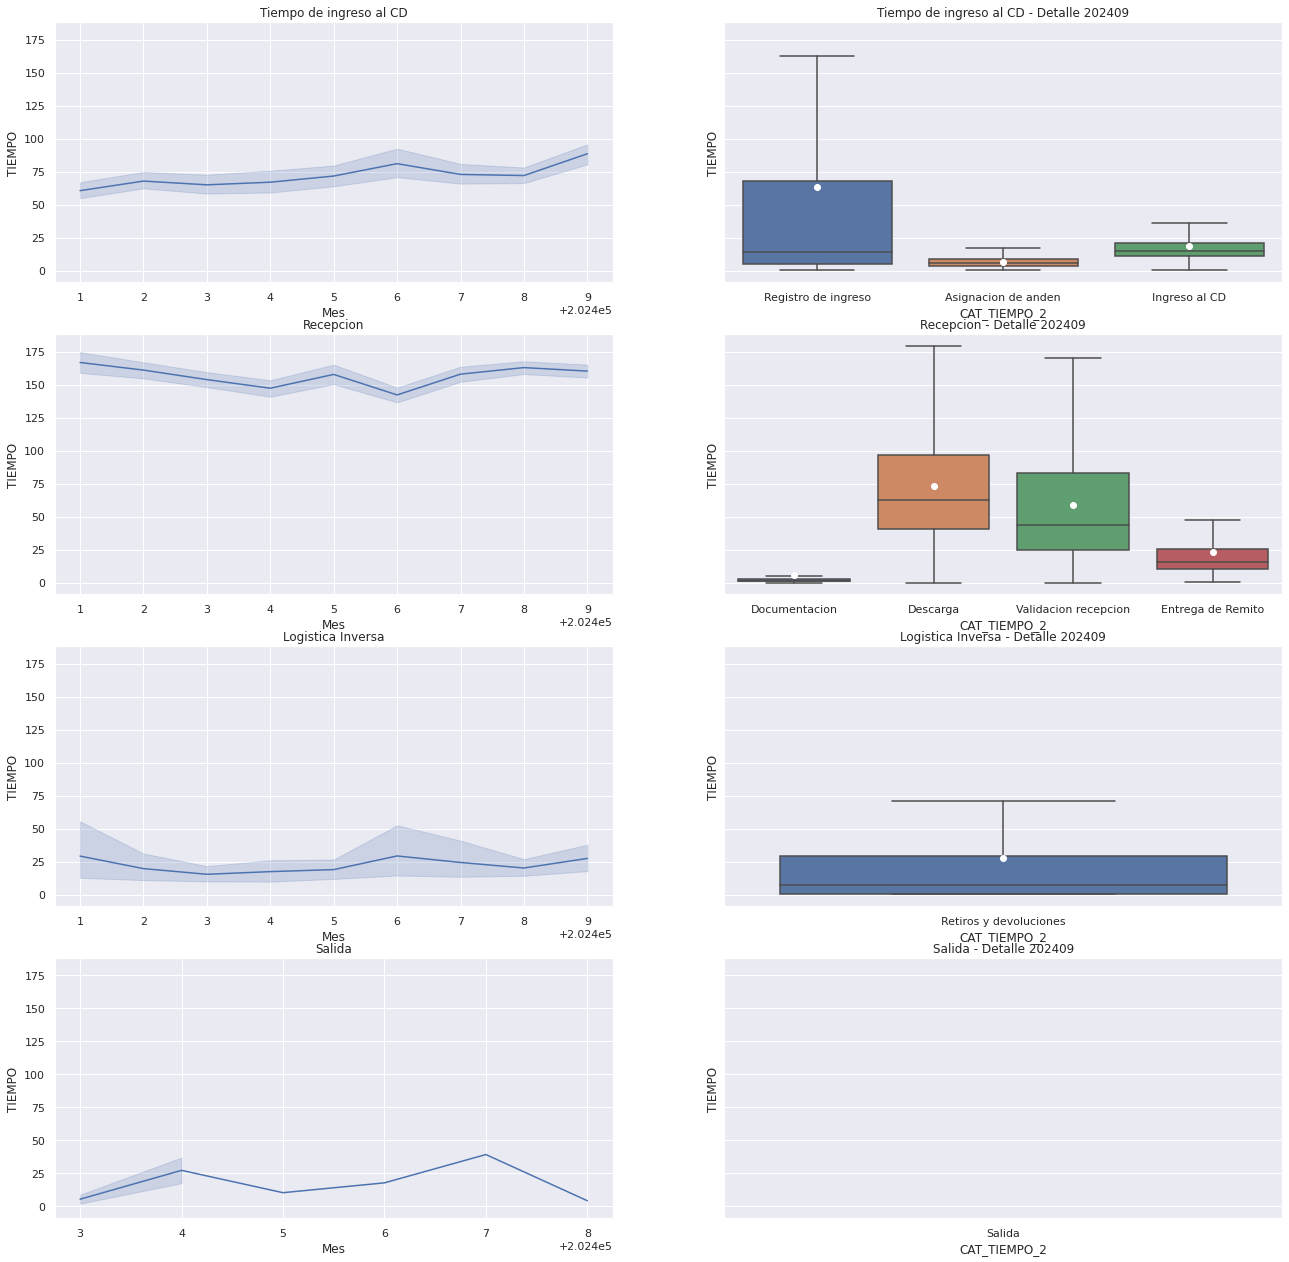

In [6]:
# RECEPCION REFRIGERADOS    RECEPCION NOA
divisiones = ['RECEPCION SECOS','RECEPCION NOA', 'RECEPCION REFRIGERADOS']
Mes = 202409

index_cols = ['DIVISION','PI','Mes','CAT_TIEMPO_2','CAT_TIEMPO_3']
mask_division = df_movimientos_2['DIVISION']== divisiones[1]
mask_na = df_movimientos_2['CAT_TIEMPO_2'].notna()


df_movimientos_agg = df_movimientos_2[mask_division & mask_na].groupby(index_cols).agg({'TIEMPO':sum, 'Recepcion_agil':max, 'Descarga_propia':max, 'Rechazos':max}).reset_index()

procesos = [{'Tiempo de ingreso al CD':['Registro de ingreso', 'Asignacion de anden', 'Ingreso al CD']},
           {'Recepcion':['Documentacion', 'Descarga', 'Validacion recepcion','Entrega de Remito']},
           {'Logistica Inversa':['Retiros y devoluciones']},
           {'Salida':['Salida']}]


# procesos = ['Tiempo de ingreso al CD', 'Recepcion', 'Logistica Inversa','Salida']
tareas = ['Registro de ingreso', 'Asignacion de anden', 'Ingreso al CD','Documentacion', 'Descarga', 'Validacion recepcion','Entrega de Remito', 'Retiros y devoluciones', 'Salida']

sns.set()
figure, axes = plt.subplots(len(procesos), 2, figsize=(22, 22), sharey=True)

for idx, proceso in enumerate(procesos):
        
    mask_proceso = df_movimientos_agg['CAT_TIEMPO_3'] == list(proceso.keys())[0]
    mask_mes = df_movimientos_agg['Mes'] == Mes
    axes[idx,0].set_title(list(proceso.keys())[0])
    axes[idx,1].set_title(list(proceso.keys())[0] + ' - Detalle ' + str(Mes))
    sns.lineplot(data=df_movimientos_agg[mask_proceso].groupby(['Mes','CAT_TIEMPO_3','PI']).agg({'TIEMPO':sum}), x="Mes", y="TIEMPO", ax=axes[idx,0])
    sns.boxplot(data=df_movimientos_agg[mask_proceso & mask_mes], x="CAT_TIEMPO_2", y="TIEMPO", showfliers=False, showmeans=True, order=list(proceso.values())[0], ax=axes[idx,1],
               meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"white"})


### Descarga

<Axes: title={'center': 'Descarga - Boxplot'}, xlabel='Descarga_propia', ylabel='TIEMPO'>

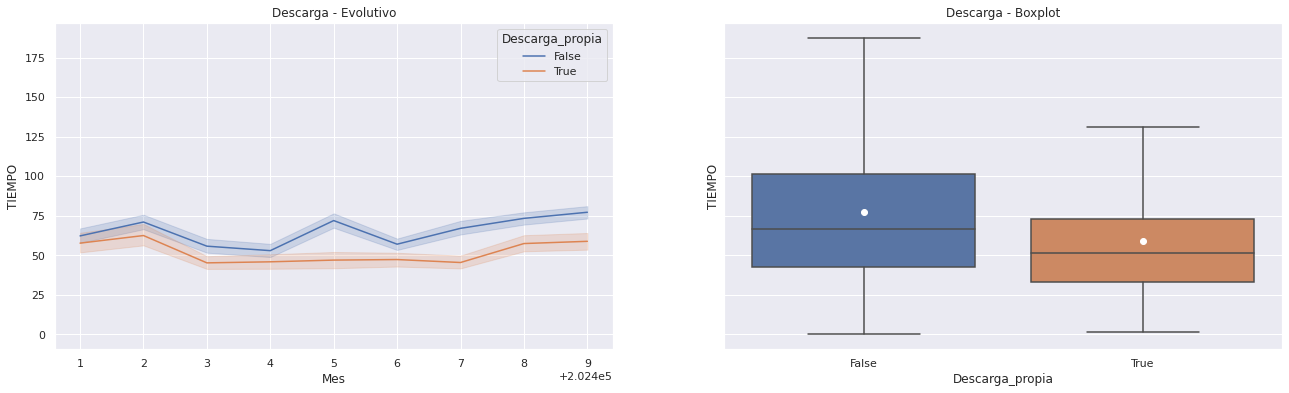

In [7]:
sns.set()
tarea = 'Descarga'
figure, axes = plt.subplots(1, 2, figsize=(22, 6), sharey=True)
mask_tarea = df_movimientos_agg['CAT_TIEMPO_2'] == tarea
mask_mes = df_movimientos_agg['Mes'] == Mes
axes[0].set_title(tarea + ' - Evolutivo')
axes[1].set_title(tarea + ' - Boxplot')
sns.lineplot(data=df_movimientos_agg[mask_tarea].groupby(['Mes','CAT_TIEMPO_2','PI','Descarga_propia']).agg({'TIEMPO':sum}), x="Mes", y="TIEMPO", hue='Descarga_propia', ax=axes[0])
sns.boxplot(data=df_movimientos_agg[mask_tarea& mask_mes].groupby(['Mes','CAT_TIEMPO_2','PI','Descarga_propia']).agg({'TIEMPO':sum}).reset_index(), x="Descarga_propia", y="TIEMPO", showfliers=False, showmeans=True, ax=axes[1],
               meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"white"})


# AGREGAR % DE DESCARGA PROPIA VS PROVEEDOR

### Validacion recepcion

<Axes: title={'center': 'Validacion recepcion - Boxplot'}, xlabel='Recepcion_agil', ylabel='TIEMPO'>

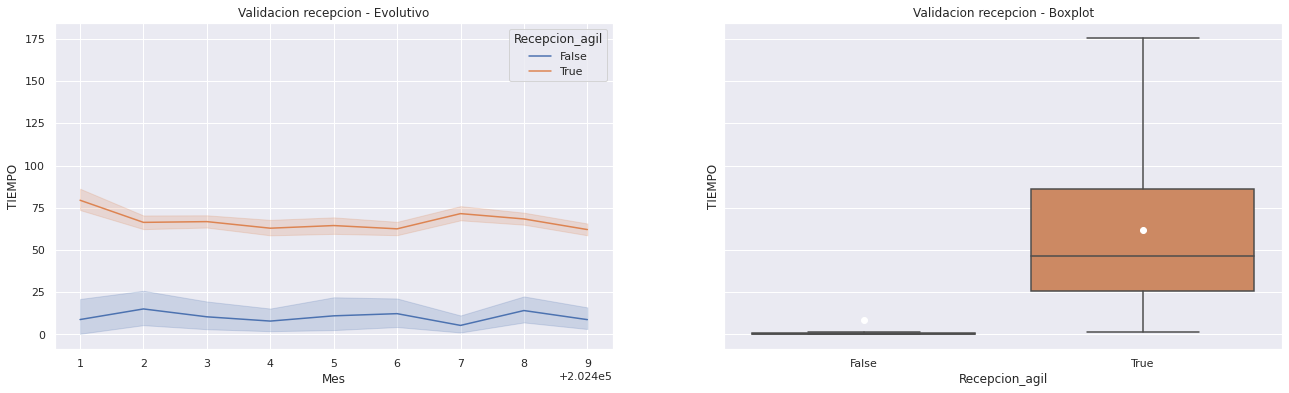

In [8]:
sns.set()
tarea = 'Validacion recepcion'
figure, axes = plt.subplots(1, 2, figsize=(22, 6), sharey=True)
mask_tarea = df_movimientos_agg['CAT_TIEMPO_2'] == tarea
mask_mes = df_movimientos_agg['Mes'] == Mes
axes[0].set_title(tarea + ' - Evolutivo')
axes[1].set_title(tarea + ' - Boxplot')
sns.lineplot(data=df_movimientos_agg[mask_tarea].groupby(['Mes','CAT_TIEMPO_2','PI','Recepcion_agil']).agg({'TIEMPO':sum}), x="Mes", y="TIEMPO", hue='Recepcion_agil', ax=axes[0])
sns.boxplot(data=df_movimientos_agg[mask_tarea& mask_mes].groupby(['Mes','CAT_TIEMPO_2','PI','Recepcion_agil']).agg({'TIEMPO':sum}).reset_index(), x="Recepcion_agil", y="TIEMPO", showfliers=False, showmeans=True, ax=axes[1],
               meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"white"})

### Tiempo de Permanencia

<Axes: title={'center': 'Validacion recepcion - Boxplot'}, xlabel='CAT_TIEMPO_3', ylabel='TIEMPO'>

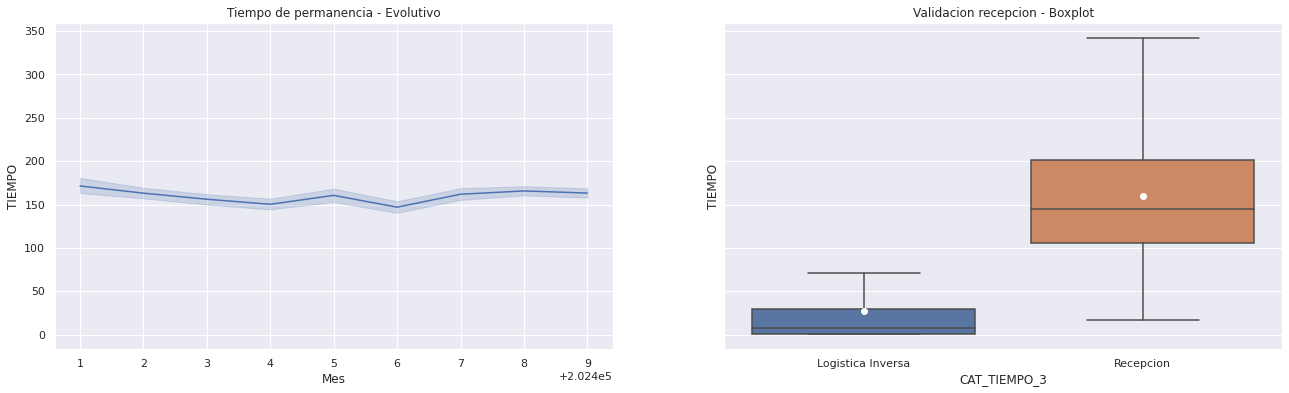

In [9]:
sns.set()
proceso = 'Tiempo de ingreso al CD'
figure, axes = plt.subplots(1, 2, figsize=(22, 6), sharey=True)
mask_proceso = df_movimientos_agg['CAT_TIEMPO_3'] != proceso
mask_mes = df_movimientos_agg['Mes'] == Mes
axes[0].set_title('Tiempo de permanencia' + ' - Evolutivo')
axes[1].set_title(tarea + ' - Boxplot')
sns.lineplot(data=df_movimientos_agg[mask_proceso].groupby(['Mes','PI']).agg({'TIEMPO':sum}), x="Mes", y="TIEMPO", ax=axes[0])
sns.boxplot(data=df_movimientos_agg[mask_proceso & mask_mes].groupby(['Mes','CAT_TIEMPO_3','PI']).agg({'TIEMPO':sum}).reset_index(), x="CAT_TIEMPO_3", y="TIEMPO", showfliers=False, showmeans=True, ax=axes[1],
               meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"white"})


### Salida

In [16]:
index_cols = ['Mes','CAT_TIEMPO_3']
mask_division = df_movimientos_2['DIVISION']== divisiones[1]
mask_proceso = df_movimientos_2['CAT_TIEMPO_3'] == 'Salida'

print(divisiones[1])

df_movimientos_2[mask_division & mask_proceso]['PI'].nunique()
df_movimientos_2[mask_division & mask_proceso].groupby(index_cols).agg({'TIEMPO':'mean','PI':'count'})

RECEPCION NOA


,,TIEMPO,PI
Mes,CAT_TIEMPO_3,,
202403,Salida,5.516667,2
202404,Salida,27.375000,2
202405,Salida,10.450000,1
202406,Salida,17.900000,1
202407,Salida,39.350000,1
202408,Salida,4.350000,1


In [ ]:
# Grafico final

# RECEPCION REFRIGERADOS    RECEPCION NOA
divisiones = ['RECEPCION SECOS','RECEPCION NOA', 'RECEPCION REFRIGERADOS']
Mes = 202409



index_cols = ['DIVISION','PI','Mes','CAT_TIEMPO_2','CAT_TIEMPO_3']
mask_division = df_movimientos_2['DIVISION']== divisiones[1]

df_movimientos_agg = df_movimientos_2[mask_division].groupby(index_cols).agg({'TIEMPO':sum, 'Recepcion_agil':max, 'Descarga_propia':max, 'Rechazos':max}).reset_index()

sns.set()
figure, axes = plt.subplots(2, 3, figsize=(22, 14))








figure.suptitle("Tiempos de Recepción")
# Muestra la media con IC=95%
Tarea = 'Documentacion'
mask = df_movimientos_agg['CAT_TIEMPO_2'] == Tarea
axes[0,0].set_title('Documentacion')
sns.lineplot(data=df_movimientos_agg[mask], x="Mes", y="TIEMPO", hue="DIVISION", ax=axes[0,0])
# sns.histplot(data=df_movimientos_agg[mask], x="TIEMPO", fill=False, binrange=(0,15), ax=axes[0,2])


Tarea = 'Descarga'
mask = df_movimientos_agg['CAT_TIEMPO_2'] == Tarea
axes[0,1].set_title('Descarga')
sns.lineplot(data=df_movimientos_agg[mask], x="Mes", y="TIEMPO", hue="DIVISION", style='Descarga_propia', ax=axes[0,1])


Tarea = 'Validacion recepcion'
mask = df_movimientos_agg['CAT_TIEMPO_2'] == Tarea
axes[1,0].set_title('Validacion recepcion')
sns.lineplot(data=df_movimientos_agg[mask], x="Mes", y="TIEMPO", hue="DIVISION", style='Recepcion_agil', ax=axes[1,0])

Tarea = 'Validacion recepcion'
mask = df_movimientos_agg['CAT_TIEMPO_2'] == Tarea
mask_agil = df_movimientos_agg['Recepcion_agil'] == True
axes[1,2].set_title('Validacion recepcion agil')
sns.lineplot(data=df_movimientos_agg[mask & mask_agil], x="Mes", y="TIEMPO", hue="DIVISION", style='Rechazos', ax=axes[1,2])


Tarea = 'Entrega de Remito'
mask = df_movimientos_agg['CAT_TIEMPO_2'] == Tarea
axes[1,1].set_title('Entrega de Remito')
sns.lineplot(data=df_movimientos_agg[mask], x="Mes", y="TIEMPO", hue="DIVISION", ax=axes[1,1])



In [ ]:
df_movimientos_agg[mask_tarea& mask_mes].groupby(['Mes','CAT_TIEMPO_2','PI','Descarga_propia']).agg({'TIEMPO':sum})

In [ ]:
df_movimientos[['CAT_TIEMPO_2','CAT_TIEMPO_3']].unique()

In [ ]:
df_movimientos_2.head()

In [ ]:
df_movimientos['Categoria_tiempo'].unique()